In [ ]:
!python --version
# use python 3.8.17

In [1]:
!pip install mlflow
!pip install micromlgen
!pip install pycaret

!pip install --upgrade pycaret

Defaulting to user installation because normal site-packages is not writeable
  Using cached mlflow-2.4.2-py3-none-any.whl (18.1 MB)
  Using cached databricks-cli-0.17.7.tar.gz (83 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached sqlparse-0.4.4-py3-none-any.whl (41 kB)
  Using cached alembic-1.11.1-py3-none-any.whl (224 kB)
  Using cached docker-6.1.3-py3-none-any.whl (148 kB)
                                              0.0/96.9 kB ? eta -:--:--
     ---------------------------------------- 96.9/96.9 kB 2.7 MB/s eta 0:00:00
  Using cached querystring_parser-1.2.4-py2.py3-none-any.whl (7.9 kB)
                                              0.0/2.0 MB ? eta -:--:--
     ---------------------                    1.1/2.0 MB 23.1 MB/s eta 0:00:01
     ---------------------------------------  2.0/2.0 MB 25.3 MB/s eta 0:00:01
     ---------------------------------------- 2.0/2.0 MB 21.3 MB/s eta 0:00:00
                  

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress t

Defaulting to user installation because normal site-packages is not writeable
  Using cached micromlgen-1.1.28.tar.gz (12 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for micromlgen: filename=micromlgen-1.1.28-py3-none-any.whl size=32166 sha256=e418f8edd530d534750dea9adb871a45415fb0bbd70ad0713149cc2cea0d0cea
  Stored in directory: c:\users\karap\appdata\local\pip\cache\wheels\b5\c1\36\9848f822936171a90ec43d0534cb86a58e1dff20c645e22074
Successfully built micromlgen
Defaulting to user installation because normal site-packages is not writeable
  Using cached pycaret-3.0.4-py3-none-any.whl (484 kB)
                                              0.0/11.0 MB ? eta -:--:--
                                              0.1/11.0 MB 4.1 MB/s eta 0:00:03
     --                                       0.8/11.0 MB 9.6 MB/s eta 0:00:02
     ---                                      1.0/11.0 MB 11.1 MB/s eta 0:00:01
     ---   

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


Defaulting to user installation because normal site-packages is not writeable


In [ ]:
import pandas as pd
from mlflow import *
from pycaret.classification import *
from sklearn.model_selection import train_test_split
from micromlgen import port

In [4]:
SEED = 42
VAL_SET_SIZE = 0.25
!md
# Assuming you have a DataFrame 'df' with 'target' column as the target variable
df = pd.read_csv('../data/dataset_ready.csv')


target_bins = [0, 114, 300]
df['glucose_binned'] = pd.cut(df['glucose'], target_bins, labels=False)
print(df['glucose_binned'].value_counts())

X = df.drop(['glucose_binned'],axis = 1)
y = df['glucose_binned']

X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=VAL_SET_SIZE,random_state=SEED)

df.isna().sum()
print(df.isna().sum())
print(df.columns)
print(df.dtypes)

# Initialize setup
# Normalize : True performs standardization under the hood
# PCA : True will apply PCA for dimensionality reduction
# bins : a number for binning continuous variables
setup(data = df, 
      target = 'glucose_binned',
      bin_numeric_features = ['heartrate', 'temperature'],
      normalize = True,
      normalize_method = 'robust',
      pca = True, 
      pca_components = 2,
      fold = 10,
      session_id = 123, 
      log_experiment = True)

# Compare models
# This step will train and evaluate multiple models
# using Stratified Cross Validation and rank them based on 'Accuracy'
best_model = compare_models()

# Print metrics and save model
print(best_model)

save_model(best_model, '../models/')



The syntax of the command is incorrect.


0    10503
1     9715
Name: glucose_binned, dtype: int64
uid                  0
timeofmeasurement    0
heartrate            0
ibi                  0
temperature          0
glucose              0
glucose_binned       0
dtype: int64
Index(['uid', 'timeofmeasurement', 'heartrate', 'ibi', 'temperature',
       'glucose', 'glucose_binned'],
      dtype='object')
uid                    int64
timeofmeasurement     object
heartrate            float64
ibi                  float64
temperature          float64
glucose              float64
glucose_binned         int64
dtype: object


,Description,Value
0,Session id,4238
1,Target,glucose_binned
2,Target type,Binary
3,Original data shape,"(20218, 7)"
4,Transformed data shape,"(20218, 3)"
5,Transformed train set shape,"(14152, 3)"
6,Transformed test set shape,"(6066, 3)"
7,Numeric features,5
8,Categorical features,1
9,Preprocess,True


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.9674,0.9954,0.9601,0.9716,0.9658,0.9346,0.9347,0.2220
svm,SVM - Linear Kernel,0.9659,0.0000,0.9640,0.9651,0.9645,0.9316,0.9318,0.2610
qda,Quadratic Discriminant Analysis,0.9635,0.9951,0.9784,0.9475,0.9627,0.9271,0.9275,0.2680
rf,Random Forest Classifier,0.9612,0.9914,0.9515,0.9673,0.9593,0.9222,0.9224,0.8720
knn,K Neighbors Classifier,0.9600,0.9819,0.9518,0.9646,0.9581,0.9198,0.9200,0.5850
gbc,Gradient Boosting Classifier,0.9589,0.9937,0.9516,0.9626,0.9570,0.9177,0.9178,0.9230
et,Extra Trees Classifier,0.9589,0.9933,0.9472,0.9667,0.9568,0.9177,0.9179,0.6540
ada,Ada Boost Classifier,0.9565,0.9918,0.9444,0.9644,0.9542,0.9127,0.9130,0.5030
lightgbm,Light Gradient Boosting Machine,0.9521,0.9923,0.9350,0.9642,0.9494,0.9039,0.9043,0.5090
dt,Decision Tree Classifier,0.9504,0.9498,0.9357,0.9601,0.9477,0.9005,0.9009,0.2980


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=4238, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=C:\Users\karap\AppData\Local\Temp\joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['uid', 'heartrate', 'ibi',
                                              'temperature', 'glucose'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               missing_values=nan,
                                                               strategy='mean',
                                                               verbose='deprecated')...
                                                     power_iteration_normalizer='auto',
                 

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9675,0.9967,0.9500,0.9818,0.9656,0.9348,0.9353
1,0.9484,0.9936,0.9235,0.9676,0.9451,0.8966,0.8974
2,0.9428,0.9886,0.9235,0.9559,0.9394,0.8852,0.8857
3,0.9477,0.9893,0.9353,0.9550,0.9450,0.8952,0.8953
4,0.9477,0.9922,0.9279,0.9619,0.9446,0.8951,0.8956
5,0.9534,0.9926,0.9412,0.9610,0.9510,0.9065,0.9067
6,0.9505,0.9911,0.9382,0.9580,0.9480,0.9008,0.9010
7,0.9611,0.9953,0.9412,0.9771,0.9588,0.9220,0.9226
8,0.9392,0.9869,0.9206,0.9514,0.9357,0.8781,0.8785


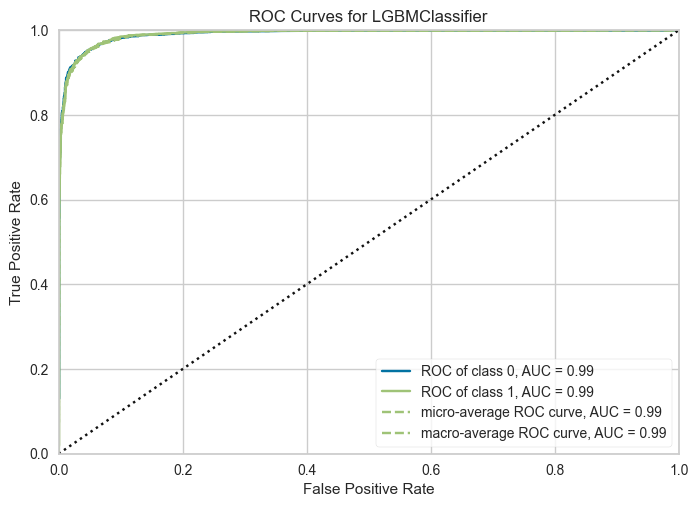

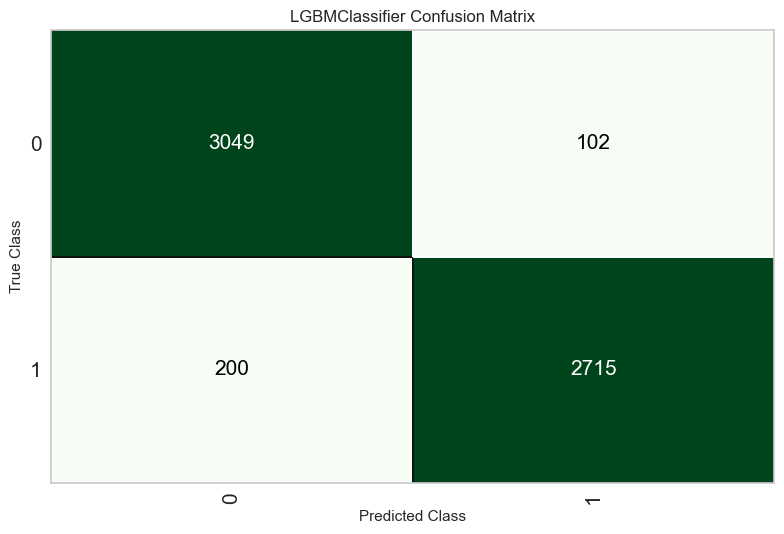

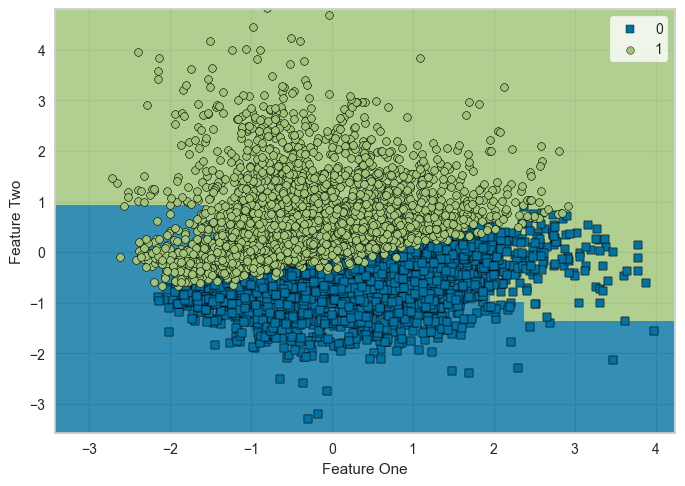

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9760,0.9979,0.9662,0.9835,0.9748,0.9519,0.9520
1,0.9647,0.9957,0.9529,0.9730,0.9629,0.9292,0.9294
2,0.9625,0.9950,0.9529,0.9686,0.9607,0.9249,0.9250
3,0.9654,0.9936,0.9574,0.9702,0.9637,0.9306,0.9307
4,0.9625,0.9944,0.9632,0.9590,0.9611,0.9250,0.9250
5,0.9703,0.9950,0.9676,0.9705,0.9691,0.9405,0.9405
6,0.9654,0.9944,0.9647,0.9633,0.9640,0.9306,0.9306
7,0.9739,0.9974,0.9618,0.9835,0.9725,0.9476,0.9478
8,0.9576,0.9933,0.9485,0.9627,0.9556,0.9150,0.9151


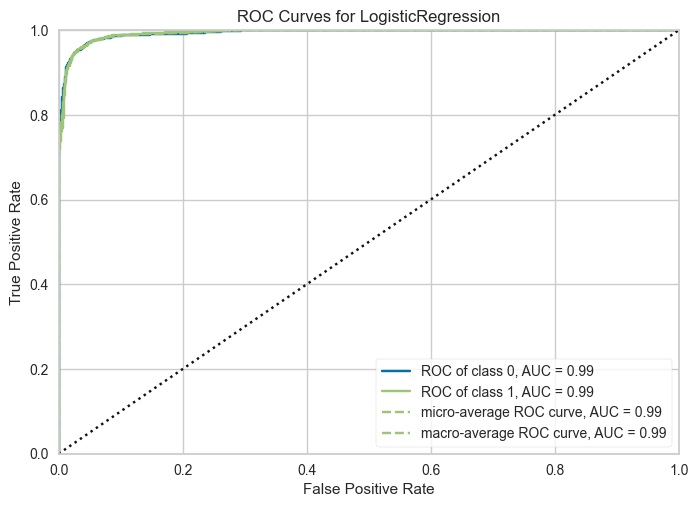

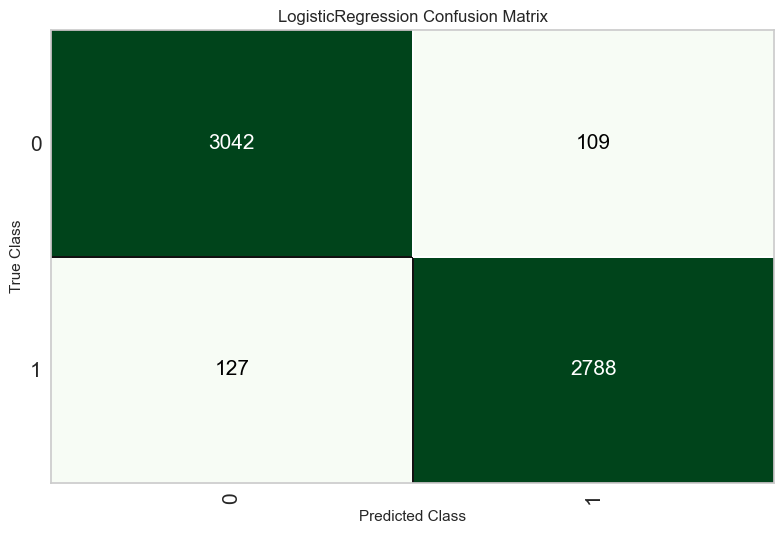

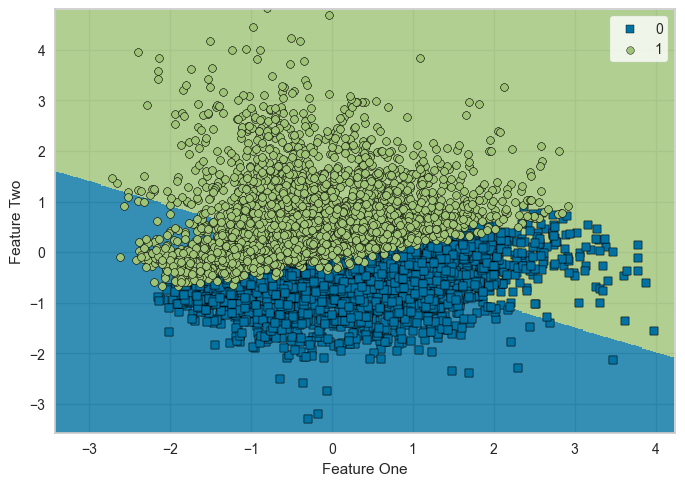

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9746,0.9977,0.9838,0.9640,0.9738,0.9491,0.9493
1,0.9633,0.9952,0.9765,0.9486,0.9623,0.9265,0.9269
2,0.9675,0.9950,0.9809,0.9529,0.9667,0.9350,0.9353
3,0.9583,0.9932,0.9765,0.9392,0.9575,0.9166,0.9173
4,0.9569,0.9941,0.9779,0.9353,0.9561,0.9138,0.9147
5,0.9640,0.9948,0.9868,0.9411,0.9634,0.9279,0.9289
6,0.9640,0.9942,0.9779,0.9486,0.9631,0.9279,0.9283
7,0.9654,0.9968,0.9779,0.9514,0.9645,0.9307,0.9310
8,0.9548,0.9928,0.9691,0.9387,0.9537,0.9095,0.9100


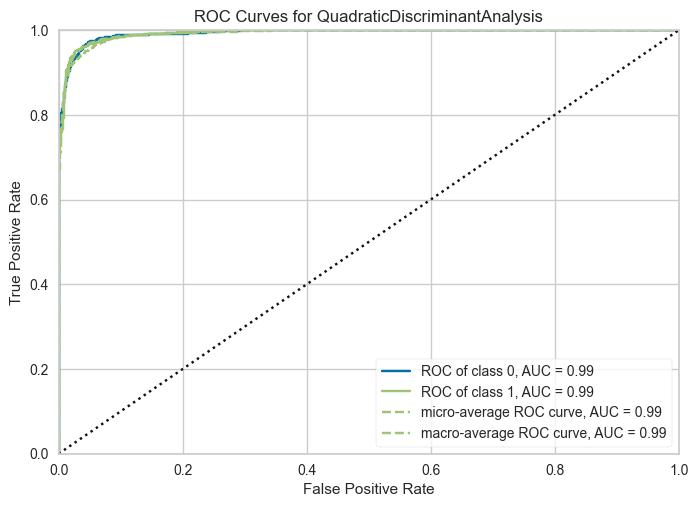

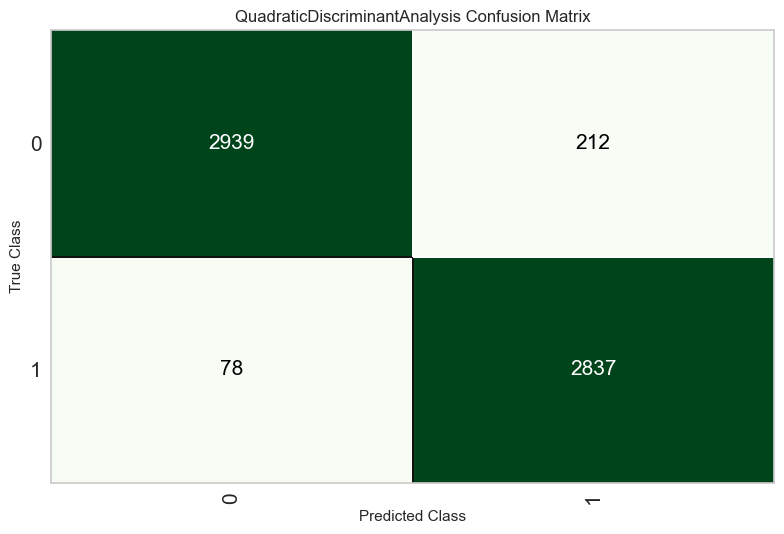

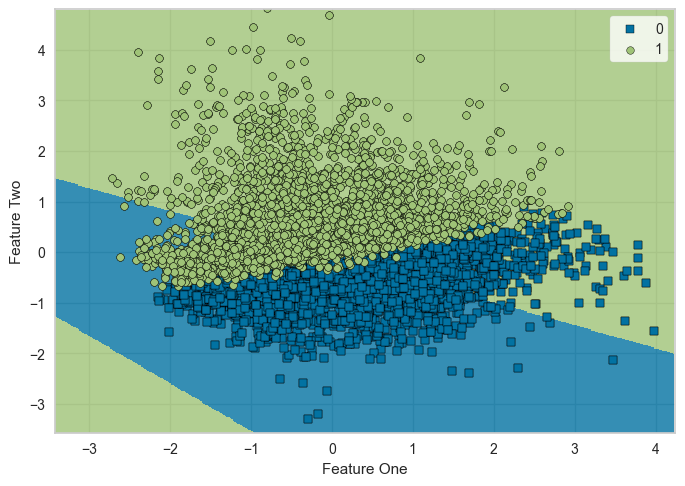

ValueError: Estimator xgboost not available. Please see docstring for list of available estimators.

In [7]:
# Check detailed performance for more models

mod = create_model('lightgbm')
plot_model(mod, plot = 'auc')
plot_model(mod, plot = 'confusion_matrix')
plot_model(mod, plot = 'boundary')

modlr = create_model('lr')
plot_model(modlr, plot = 'auc')
plot_model(modlr, plot = 'confusion_matrix')
plot_model(modlr, plot = 'boundary')

modqda = create_model('qda')
plot_model(modqda, plot = 'auc')
plot_model(modqda, plot = 'confusion_matrix')
plot_model(modqda, plot = 'boundary')

modxgboost = create_model('xgboost')
plot_model(modxgboost, plot = 'auc')
plot_model(modxgboost, plot = 'confusion_matrix')
plot_model(modxgboost, plot = 'boundary')

In [6]:
# print(str(modlr).split("(")[0])
if str(modlr).split("(")[0] in ["LogisticRegression"]:
    c_code = port(modlr)
    print(c_code)
else:
    print("Model type is not supported by micromlgen.")

#pragma once
#include <cstdarg>
namespace Eloquent {
    namespace ML {
        namespace Port {
            class LogisticRegression {
                public:
                    /**
                    * Predict class for features vector
                    */
                    int predict(float *x) {
                        float votes[2] = { 0.575414893001  };
                        votes[0] += dot(x,   13.390924277746  , 7.218612167703 );
                        // return argmax of votes
                        uint8_t classIdx = 0;
                        float maxVotes = votes[0];

                        for (uint8_t i = 1; i < 2; i++) {
                            if (votes[i] > maxVotes) {
                                classIdx = i;
                                maxVotes = votes[i];
                            }
                        }

                        return classIdx;
                    }

                protected:
                    /**
                 